## Putting it all together

In [1]:
import seaborn as sns; sns.set_style("dark")
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, StandardScaler, Normalizer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import janitor
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, ElasticNetCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
from sklearn.feature_selection import RFECV
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
import janitor

In [2]:
data = pd.read_csv("data/bankchurnersuse.csv").clean_names()

In [3]:
data

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [4]:
train, test = train_test_split(data, random_state = 10, train_size = 0.8, stratify = data["attrition_flag"])

In [5]:
train, test_init = train_test_split(train, random_state = 10, train_size = 0.8, stratify = train["attrition_flag"])

In [6]:
train.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
2147,770882508,Existing Customer,38,M,2,College,Married,$80K - $120K,Blue,24,...,1,5,17162.0,773,16389.0,1.238,2457,54,1.000,0.045
7967,712200033,Existing Customer,44,F,4,High School,Single,Less than $40K,Blue,36,...,3,3,3024.0,0,3024.0,0.750,4983,78,0.733,0.000
9892,806917983,Existing Customer,32,F,2,Graduate,Divorced,Unknown,Silver,27,...,3,1,33779.0,1526,32253.0,0.879,15200,126,0.800,0.045
7983,715463133,Existing Customer,40,M,5,High School,Single,$120K +,Blue,31,...,1,3,34516.0,1427,33089.0,0.706,3699,64,0.488,0.041
5638,711824358,Existing Customer,44,F,4,College,Single,Less than $40K,Blue,31,...,3,2,3228.0,0,3228.0,0.747,4524,70,0.667,0.000


In [7]:
test.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
3933,815240358,Existing Customer,47,F,3,Uneducated,Married,Unknown,Blue,42,...,1,4,25027.0,1501,23526.0,1.063,3357,62,0.771,0.060
2790,779284833,Existing Customer,55,M,2,Post-Graduate,Single,$60K - $80K,Blue,37,...,3,1,22127.0,1799,20328.0,0.758,3591,63,0.750,0.081
8663,719658858,Existing Customer,50,F,4,Doctorate,Married,Unknown,Silver,36,...,2,1,34516.0,2096,32420.0,0.666,7042,73,0.553,0.061
731,719459358,Existing Customer,52,M,1,Doctorate,Married,$120K +,Blue,41,...,2,2,33864.0,989,32875.0,1.219,1751,48,0.920,0.029
3335,734924658,Existing Customer,47,F,5,High School,Married,Less than $40K,Blue,36,...,3,1,1478.0,792,686.0,0.873,4123,67,0.489,0.536


### Hardcoded Feature Engineering

In [8]:
train["revolving_trans"] = train["total_revolving_bal"]/train["total_trans_amt"]
test_init["revolving_trans"] = test_init["total_revolving_bal"]/test_init["total_trans_amt"]
test["revolving_trans"] = test["total_revolving_bal"]/test["total_trans_amt"]

In [9]:
train["marriage_education"] = train["marital_status"] + "_" + train["education_level"]
test_init["marriage_education"] = test_init["marital_status"] + "_" + test_init["education_level"]
test["marriage_education"] = test["marital_status"] + "_" + test["education_level"]

In [10]:
train["attrition_flag"] = train["attrition_flag"].replace(["Attrited Customer","Existing Customer"], [1,0]).astype(int)
test["attrition_flag"] = test["attrition_flag"].replace(["Attrited Customer","Existing Customer"], [1,0]).astype(int)
test_init["attrition_flag"] = test_init["attrition_flag"].replace(["Attrited Customer","Existing Customer"], [1,0]).astype(int)

### Data deduplication

In [11]:
train_0 = train[train["attrition_flag"] == 0]
train_0.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,revolving_trans,marriage_education
2147,770882508,0,38,M,2,College,Married,$80K - $120K,Blue,24,...,17162.0,773,16389.0,1.238,2457,54,1.000,0.045,0.314611,Married_College
7967,712200033,0,44,F,4,High School,Single,Less than $40K,Blue,36,...,3024.0,0,3024.0,0.750,4983,78,0.733,0.000,0.000000,Single_High School
9892,806917983,0,32,F,2,Graduate,Divorced,Unknown,Silver,27,...,33779.0,1526,32253.0,0.879,15200,126,0.800,0.045,0.100395,Divorced_Graduate
7983,715463133,0,40,M,5,High School,Single,$120K +,Blue,31,...,34516.0,1427,33089.0,0.706,3699,64,0.488,0.041,0.385780,Single_High School
5638,711824358,0,44,F,4,College,Single,Less than $40K,Blue,31,...,3228.0,0,3228.0,0.747,4524,70,0.667,0.000,0.000000,Single_College


In [12]:
train_1 = train[train["attrition_flag"] == 1]
train_1.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,revolving_trans,marriage_education
5562,787665258,1,47,F,3,Unknown,Married,Less than $40K,Blue,37,...,1438.3,0,1438.3,0.749,2393,36,0.636,0.0,0.0,Married_Unknown
6731,711122958,1,41,F,3,Graduate,Single,Less than $40K,Blue,33,...,1764.0,0,1764.0,0.552,2105,57,0.839,0.0,0.0,Single_Graduate
2174,712551258,1,39,M,1,Uneducated,Married,Less than $40K,Blue,36,...,4247.0,0,4247.0,0.405,847,17,0.133,0.0,0.0,Married_Uneducated
7973,820694133,1,60,F,0,High School,Married,Unknown,Blue,55,...,5549.0,0,5549.0,0.703,2412,38,0.520,0.0,0.0,Married_High School
2284,710586483,1,26,F,0,High School,Single,Unknown,Blue,13,...,6152.0,0,6152.0,0.391,968,23,0.533,0.0,0.0,Single_High School


In [13]:
train_0 = train_0.drop_duplicates()

### Class balancing

In [14]:
rand_list = list(np.random.randint(0, len(train_0), len(train_1)))

In [15]:
train_0 = train_0.iloc[rand_list,]
train_0.shape

(1041, 23)

In [16]:
train_new = pd.concat([train_0, train_1], axis = 0)
train_new.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,revolving_trans,marriage_education
8117,771471708,0,44,F,2,Graduate,Unknown,Less than $40K,Blue,32,...,3080.0,1776,1304.0,0.973,5097,77,0.833,0.577,0.348440,Unknown_Graduate
5049,719749083,0,63,M,0,Doctorate,Single,Less than $40K,Blue,54,...,7098.0,2224,4874.0,0.864,3465,59,0.788,0.313,0.641847,Single_Doctorate
5969,708807483,0,51,F,3,Graduate,Married,$40K - $60K,Blue,45,...,9117.0,1259,7858.0,0.880,3837,75,0.705,0.138,0.328121,Married_Graduate
6197,779643858,0,55,F,1,Graduate,Married,Less than $40K,Blue,38,...,2033.0,1037,996.0,1.064,4100,82,0.708,0.510,0.252927,Married_Graduate
155,713786508,0,42,F,5,Unknown,Married,$40K - $60K,Blue,36,...,2038.0,0,2038.0,0.786,1238,28,0.750,0.000,0.000000,Married_Unknown


### Splitting into independent and dependent variables

In [17]:
x_train, y_train = train_new.drop(['attrition_flag','gender','clientnum'], axis = 1), train_new["attrition_flag"]

In [18]:
x_test, y_test = test.drop(['attrition_flag','gender','clientnum'], axis = 1), test["attrition_flag"]

In [19]:
x_test_init, y_test_init = test_init.drop(['attrition_flag','gender','clientnum'], axis = 1), test_init["attrition_flag"]

### Gathering categorical and numerical columns

In [20]:
num = []
cat = []
columns = list(x_train.columns)
for col in columns:
    if is_numeric_dtype(x_train[col]):
        num.append(col)
    elif is_string_dtype(x_train[col]):
        cat.append(col)

In [21]:
num

['customer_age',
 'dependent_count',
 'months_on_book',
 'total_relationship_count',
 'months_inactive_12_mon',
 'contacts_count_12_mon',
 'credit_limit',
 'total_revolving_bal',
 'avg_open_to_buy',
 'total_amt_chng_q4_q1',
 'total_trans_amt',
 'total_trans_ct',
 'total_ct_chng_q4_q1',
 'avg_utilization_ratio',
 'revolving_trans']

### Preprocessing tools

In [22]:
one_hot = OneHotEncoder()
min_max = MinMaxScaler()
sd = StandardScaler()
le = LabelEncoder()

In [23]:
ct = ColumnTransformer([("one_hot", one_hot, cat), ("min_max", min_max, num)])

### Pipeline Creation

In [24]:
pipeline = Pipeline([("ct", ct), ("dc", DecisionTreeClassifier())])

### Cross Validation via pipeline

In [25]:
cross_val_score(pipeline, x_train, y_train, cv = 5, scoring = "precision")

array([0.89855072, 0.87793427, 0.90821256, 0.92118227, 0.93627451])

### Fitting pipeline on training data

In [26]:
model = pipeline.fit(x_train, y_train)

### Evaluating pipeline's accuracy

#### Training data results

In [27]:
pred_train = model.predict(x_train)
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1041
           1       1.00      1.00      1.00      1041

    accuracy                           1.00      2082
   macro avg       1.00      1.00      1.00      2082
weighted avg       1.00      1.00      1.00      2082



<AxesSubplot:>

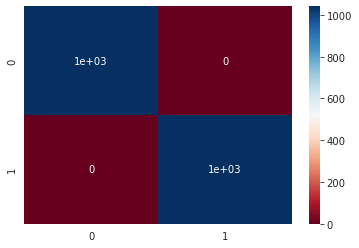

In [28]:
conf = confusion_matrix(y_train, pred_train)
sns.heatmap(conf, annot = True, cmap = "RdBu")

In [29]:
train_new["prediction"] = pred_train
train_probs = model.predict_proba(x_train)
train_new["prob_0"], train_new["prob_1"] = train_probs[:,0], train_probs[:,1]
train_new.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,revolving_trans,marriage_education,prediction,prob_0,prob_1
8117,771471708,0,44,F,2,Graduate,Unknown,Less than $40K,Blue,32,...,0.973,5097,77,0.833,0.577,0.348440,Unknown_Graduate,0,1.0,0.0
5049,719749083,0,63,M,0,Doctorate,Single,Less than $40K,Blue,54,...,0.864,3465,59,0.788,0.313,0.641847,Single_Doctorate,0,1.0,0.0
5969,708807483,0,51,F,3,Graduate,Married,$40K - $60K,Blue,45,...,0.880,3837,75,0.705,0.138,0.328121,Married_Graduate,0,1.0,0.0
6197,779643858,0,55,F,1,Graduate,Married,Less than $40K,Blue,38,...,1.064,4100,82,0.708,0.510,0.252927,Married_Graduate,0,1.0,0.0
155,713786508,0,42,F,5,Unknown,Married,$40K - $60K,Blue,36,...,0.786,1238,28,0.750,0.000,0.000000,Married_Unknown,0,1.0,0.0


#### Initial test data results

In [30]:
pred_test_init = model.predict(x_test_init)
print(classification_report(y_test_init, pred_test_init))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1360
           1       0.61      0.88      0.72       261

    accuracy                           0.89      1621
   macro avg       0.79      0.89      0.82      1621
weighted avg       0.92      0.89      0.90      1621



<AxesSubplot:>

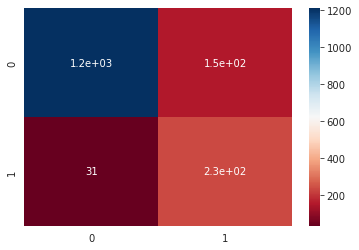

In [31]:
conf = confusion_matrix(y_test_init, pred_test_init)
sns.heatmap(conf, annot = True, cmap = "RdBu")

In [32]:
test_init["prediction"] = pred_test_init
test_init_probs = model.predict_proba(x_test_init)
test_init["prob_0"], test_init["prob_1"] = test_init_probs[:,0], test_init_probs[:,1]
test_init.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,revolving_trans,marriage_education,prediction,prob_0,prob_1
2447,712040433,0,54,F,1,High School,Married,Less than $40K,Blue,43,...,0.697,2097,57,0.541,0.954,1.049118,Married_High School,0,1.0,0.0
2052,765824058,0,46,M,4,Doctorate,Married,$80K - $120K,Blue,39,...,0.907,3784,74,0.609,0.301,0.406712,Married_Doctorate,0,1.0,0.0
7923,718548558,0,53,F,3,Unknown,Single,Less than $40K,Blue,42,...,0.927,4272,70,0.750,0.700,0.477762,Single_Unknown,0,1.0,0.0
2293,710567508,0,53,M,3,High School,Married,$80K - $120K,Blue,44,...,0.571,1387,33,0.650,0.094,1.587599,Married_High School,1,0.0,1.0
4750,715776033,0,46,M,5,Uneducated,Single,$60K - $80K,Blue,33,...,0.572,4116,68,0.700,0.000,0.000000,Single_Uneducated,0,1.0,0.0


#### Decision Tree Image

#### Decision Tree with a depth of 3

In [33]:
total_list = list(pipeline.steps[0][1].transformers_[0][1].get_feature_names()) + num
len(total_list)

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


64

In [34]:
x_train_use = ct.fit_transform(x_train)

In [36]:
dec = DecisionTreeClassifier(max_depth = 3)
dec.fit(x_train_use, y_train)

DecisionTreeClassifier(max_depth=3)

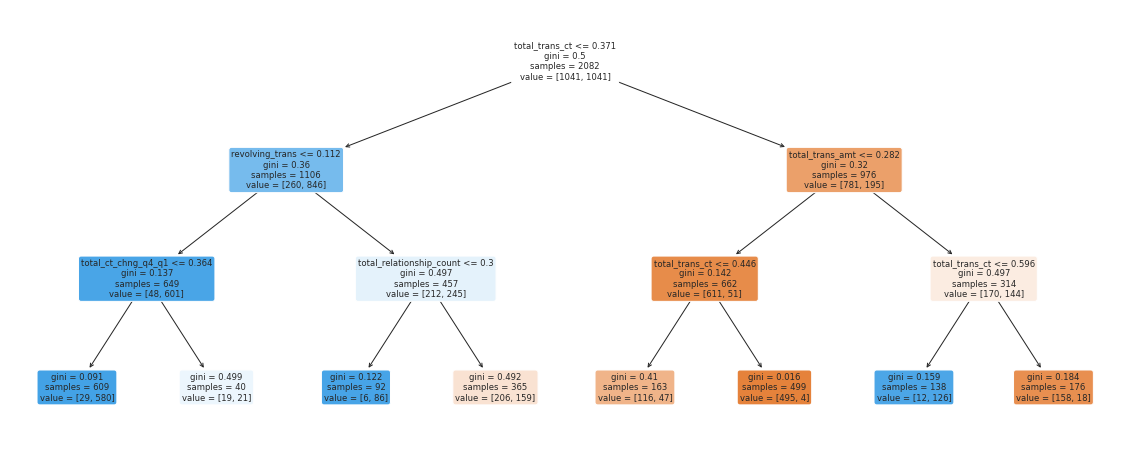

In [37]:
from sklearn import tree
fig = plt.figure(figsize=(20,8))
_ = tree.plot_tree(dec, 
                   feature_names=total_list,  
                   filled=True,
                  rounded= True)

In [38]:
model[1]

DecisionTreeClassifier()

In [39]:
from sklearn import tree

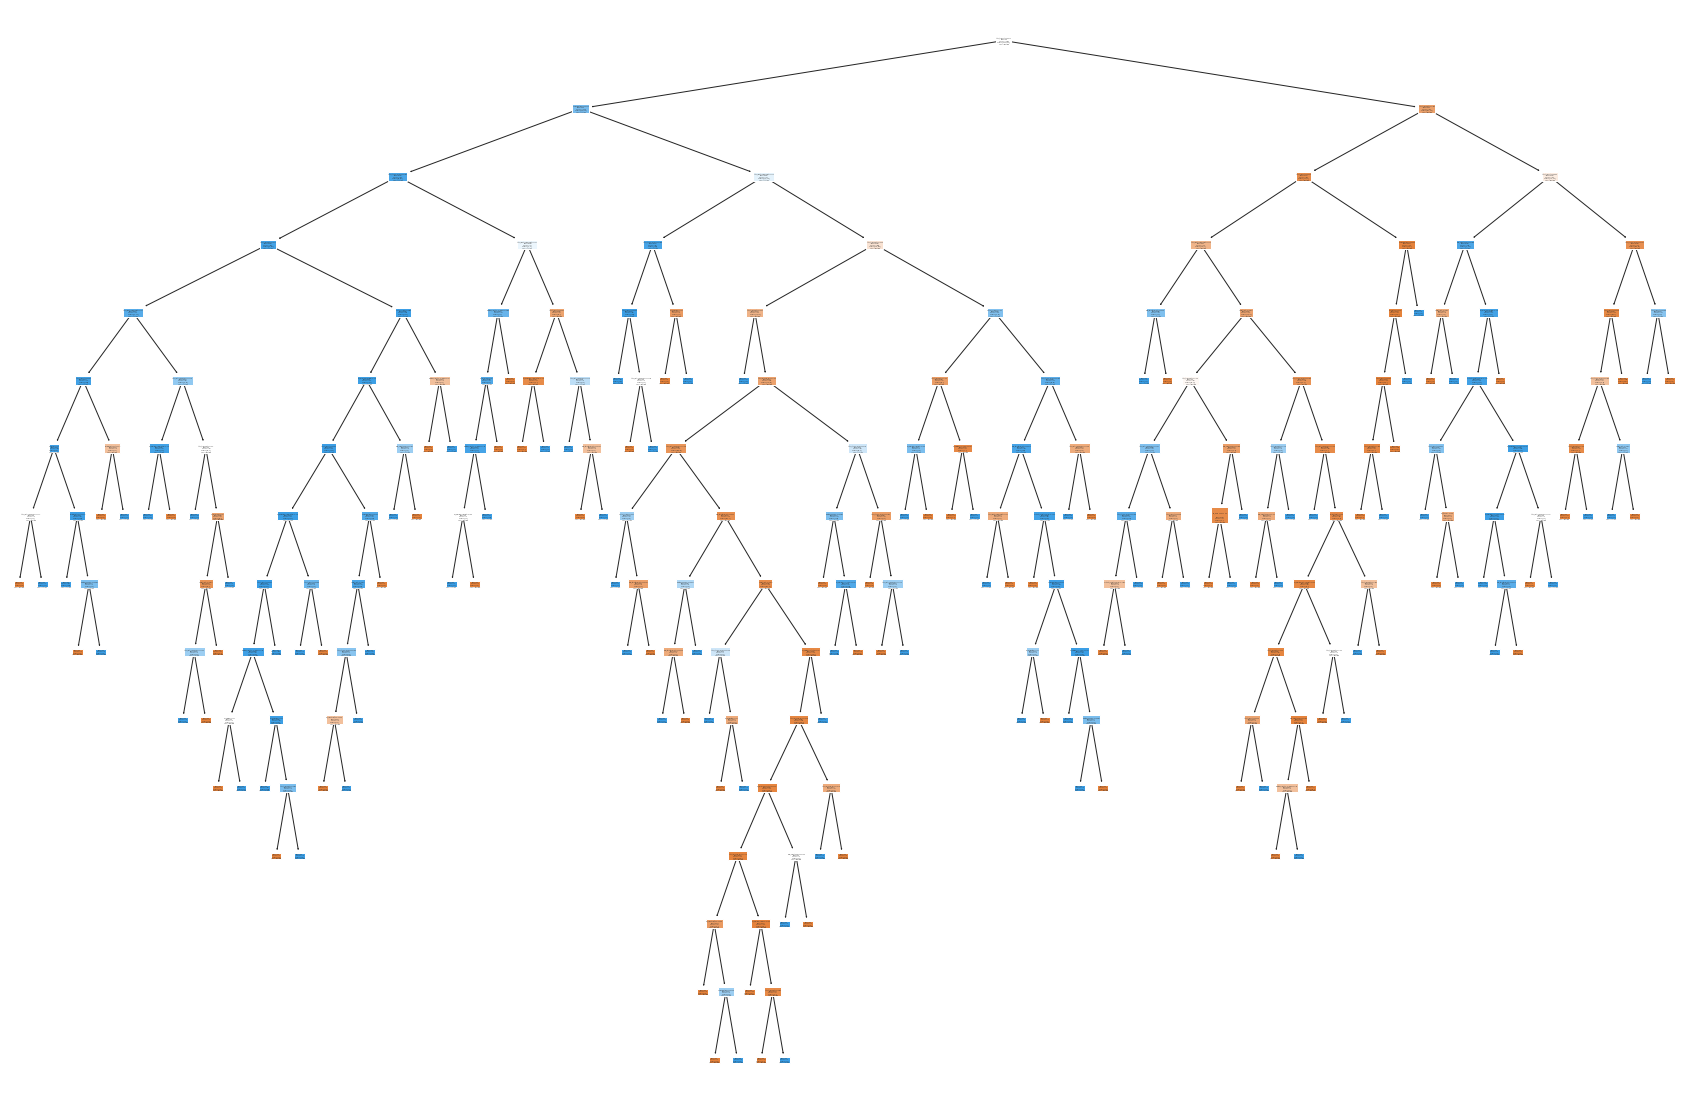

In [40]:
fig = plt.figure(figsize=(30,20))
_ = tree.plot_tree(model[1], 
                   feature_names=total_list,  
                   class_names=["Existing", "Attrited"],
                   filled=True)

#### ROC Curve/ROC AUC Score

In [41]:
roc_auc_score(y_test_init, pred_test_init)

0.8854659679963939

In [42]:
fpr, tpr, thresholds = roc_curve(y_test_init, pred_test_init)

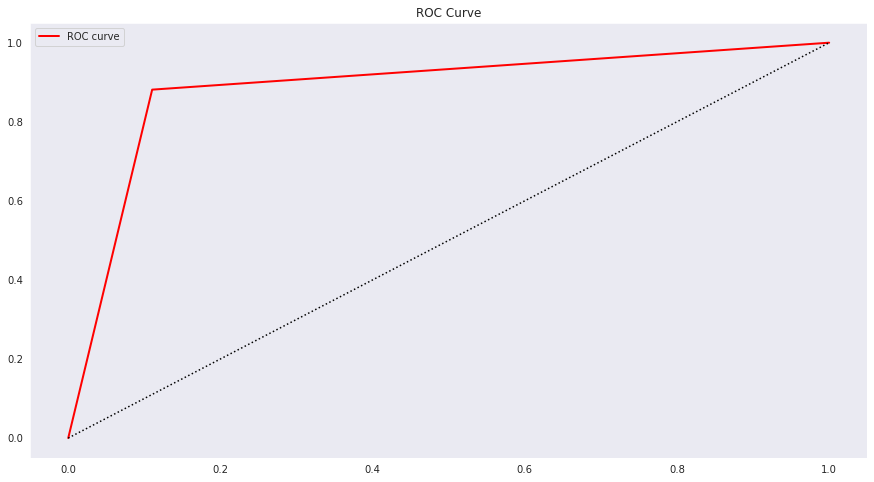

In [43]:
plt.figure(figsize = (15,8))
sns.lineplot(x = fpr, y = tpr, linewidth=2, label="ROC curve", color = "red")
plt.plot([0, 1], [0, 1], 'k:')
plt.title("ROC Curve")
plt.show()

#### Feature Importance

In [44]:
vip = pipeline.steps[1][1].feature_importances_
vip

array([0.00000000e+00, 8.98164417e-04, 2.72174191e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.30013082e-03,
       0.00000000e+00, 9.60614793e-04, 1.60102466e-03, 1.44092219e-03,
       0.00000000e+00, 0.00000000e+00, 1.78399890e-03, 3.20204931e-03,
       4.49319823e-04, 9.02795846e-04, 0.00000000e+00, 1.90964042e-03,
       0.00000000e+00, 2.34770375e-03, 8.68283718e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.40153698e-03, 3.71611230e-03,
       8.13973093e-04, 1.83390097e-03, 1.13188720e-04, 0.00000000e+00,
       1.74038928e-03, 0.00000000e+00, 2.27108312e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.12050691e-04, 0.00000000e+00, 2.14564676e-03,
       0.00000000e+00, 2.15787167e-02, 1.74132063e-03, 1.02305476e-02,
       5.87161838e-02, 7.07017937e-03, 4.35482235e-03, 1.99268972e-02,
      

In [45]:
pipeline.steps[0][1].transformers_[0][1].get_feature_names()

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_College', 'x0_Doctorate', 'x0_Graduate', 'x0_High School',
       'x0_Post-Graduate', 'x0_Uneducated', 'x0_Unknown', 'x1_Divorced',
       'x1_Married', 'x1_Single', 'x1_Unknown', 'x2_$120K +',
       'x2_$40K - $60K', 'x2_$60K - $80K', 'x2_$80K - $120K',
       'x2_Less than $40K', 'x2_Unknown', 'x3_Blue', 'x3_Gold',
       'x3_Platinum', 'x3_Silver', 'x4_Divorced_College',
       'x4_Divorced_Doctorate', 'x4_Divorced_Graduate',
       'x4_Divorced_High School', 'x4_Divorced_Post-Graduate',
       'x4_Divorced_Uneducated', 'x4_Divorced_Unknown',
       'x4_Married_College', 'x4_Married_Doctorate',
       'x4_Married_Graduate', 'x4_Married_High School',
       'x4_Married_Post-Graduate', 'x4_Married_Uneducated',
       'x4_Married_Unknown', 'x4_Single_College', 'x4_Single_Doctorate',
       'x4_Single_Graduate', 'x4_Single_High School',
       'x4_Single_Post-Graduate', 'x4_Single_Uneducated',
       'x4_Single_Unknown', 'x4_Unknown_College', 'x4_Unknown_Doctorate',
       '

In [46]:
#create df with vip info
feature_importances_info = pd.DataFrame({'feat_names':list(pipeline.steps[0][1].transformers_[0][1].get_feature_names()) + num, 'vip': vip})

#get sign and magnitude information
feature_importances_info = feature_importances_info.assign(feature_importances_mag = abs(feature_importances_info['vip']),
                             feature_importances_sign = np.sign(feature_importances_info['vip']))
feature_importances_info = feature_importances_info.set_index('feat_names').sort_values(by='feature_importances_mag', ascending=False)
feature_importances_info.head(10)

,vip,feature_importances_mag,feature_importances_sign
feat_names,,,
total_trans_ct,0.458875,0.458875,1.0
total_trans_amt,0.149518,0.149518,1.0
revolving_trans,0.085576,0.085576,1.0
total_ct_chng_q4_q1,0.062766,0.062766,1.0
total_relationship_count,0.058716,0.058716,1.0
total_amt_chng_q4_q1,0.026737,0.026737,1.0
avg_utilization_ratio,0.022629,0.022629,1.0
customer_age,0.021579,0.021579,1.0
credit_limit,0.019927,0.019927,1.0


/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


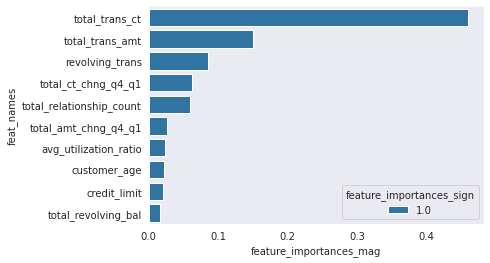

In [47]:
sns.barplot(y=feature_importances_info.index[:10], x='feature_importances_mag', hue='feature_importances_sign', 
            data=feature_importances_info[:10], orient='h', dodge=False);

In [48]:
len(feature_importances_info[feature_importances_info["vip"] > 0])

37

#### Holdout test data results

In [49]:
pred_test = model.predict(x_test)
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1701
           1       0.59      0.90      0.71       325

    accuracy                           0.88      2026
   macro avg       0.78      0.89      0.82      2026
weighted avg       0.92      0.88      0.89      2026



<AxesSubplot:>

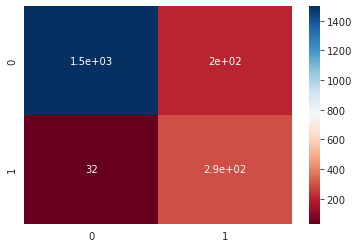

In [50]:
conf = confusion_matrix(y_test, pred_test)
sns.heatmap(conf, annot = True, cmap = "RdBu")

In [51]:
test["prediction"] = pred_test
test_probs = model.predict_proba(x_test)
test["prob_0"], test["prob_1"] = test_probs[:,0], test_probs[:,1]
test.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,revolving_trans,marriage_education,prediction,prob_0,prob_1
3933,815240358,0,47,F,3,Uneducated,Married,Unknown,Blue,42,...,1.063,3357,62,0.771,0.060,0.447125,Married_Uneducated,0,1.0,0.0
2790,779284833,0,55,M,2,Post-Graduate,Single,$60K - $80K,Blue,37,...,0.758,3591,63,0.750,0.081,0.500975,Single_Post-Graduate,0,1.0,0.0
8663,719658858,0,50,F,4,Doctorate,Married,Unknown,Silver,36,...,0.666,7042,73,0.553,0.061,0.297643,Married_Doctorate,1,0.0,1.0
731,719459358,0,52,M,1,Doctorate,Married,$120K +,Blue,41,...,1.219,1751,48,0.920,0.029,0.564820,Married_Doctorate,1,0.0,1.0
3335,734924658,0,47,F,5,High School,Married,Less than $40K,Blue,36,...,0.873,4123,67,0.489,0.536,0.192093,Married_High School,0,1.0,0.0


#### ROC Curve/ROC AUC Score

In [52]:
roc_auc_score(y_test, pred_test)

0.8908045041378375

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, pred_test)

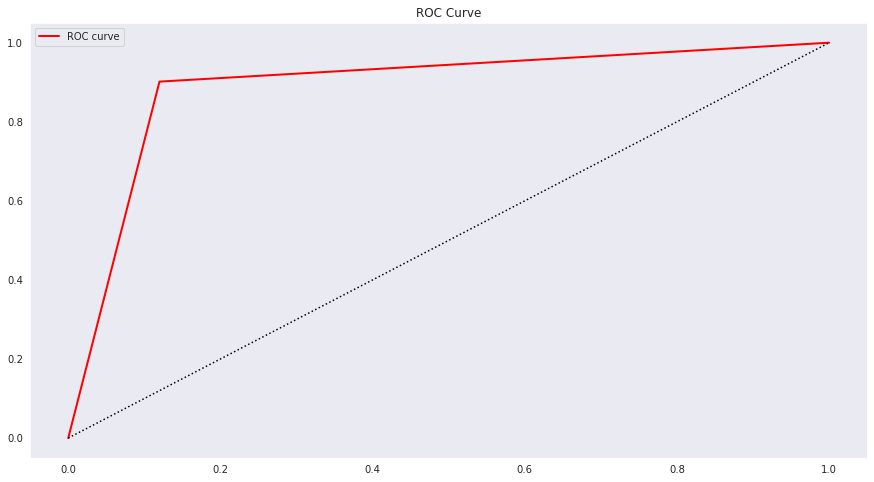

In [54]:
plt.figure(figsize = (15,8))
sns.lineplot(x = fpr, y = tpr, linewidth=2, label="ROC curve", color = "red")
plt.plot([0, 1], [0, 1], 'k:')
plt.title("ROC Curve")
plt.show()